In [15]:
import numpy as np
import matplotlib.pyplot as plt

1 : 12 | 1 2 3 4 5 -6 -7 -8 9 -10 -11 -12

In [16]:
x = np.array([[-0.5, -2, 0], [1, 1, 1], [2, 2, 2]])
y = np.array([[2, 1, 0], [2, 0, -1], [2, 1, 1]])
z = np.array([[1, -1, 2], [0, -0.5, 2], [0.5, 1, 2]])

In [17]:
uCELLS = 12
wCELLS = 10

uPTS = np.size(x, 0)
wPTS = np.size(x, 1)

n = uPTS - 1
m = wPTS - 1

u = np.linspace(0, 1, uCELLS)
w = np.linspace(0, 1, wCELLS) 

xBezier = np.zeros((uCELLS, wCELLS))
yBezier = np.zeros((uCELLS, wCELLS))
zBezier = np.zeros((uCELLS, wCELLS))

In [18]:
def Ni(n, i):
    return np.math.factorial(n) / (np.math.factorial(i) * np.math.factorial(n - i))


def Mj(m, j):
    return np.math.factorial(m) / (np.math.factorial(j) * np.math.factorial(m - j))


def J(n, i, u):
    return np.matrix(Ni(n, i) * (u ** i) * (1 - u) ** (n - i))


def K(m, j, w):
    return np.matrix(Mj(m, j) * (w ** j) * (1 - w) ** (m - j))

In [19]:
b = []
d = []

for i in range(0, uPTS):

    for j in range(0, wPTS):
        b.append(J(n, i, u))
        d.append(K(m, j, w))

        Jt = J(n, i, u).transpose()

        xBezier = Jt * K(m, j, w) * x[i, j] + xBezier
        yBezier = Jt * K(m, j, w) * y[i, j] + yBezier
        zBezier = Jt * K(m, j, w) * z[i, j] + zBezier

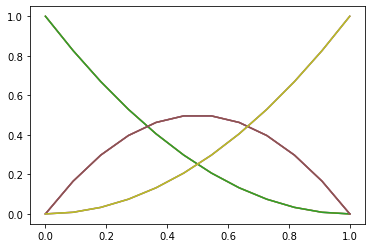

In [20]:
plt.figure()
plt.subplot()
for line in b:
    plt.plot(u, line.transpose())



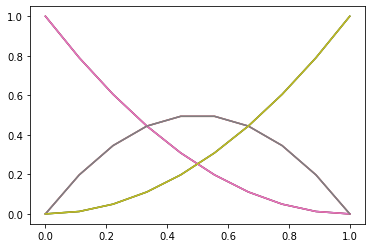

In [21]:
for line in d:
    plt.plot(w, line.transpose())
plt.show()

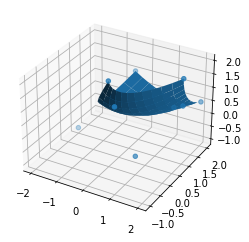

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(xBezier, yBezier, zBezier)
ax.scatter(x, y, z, edgecolors='face')
plt.show()

In [23]:
import plotly.graph_objects as go

fig = go.Figure()

# 3D surface plot
fig.add_trace(go.Surface(z=zBezier, x=xBezier, y=yBezier))

# Scatter plot
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers'))

fig.show()
